<a href="https://colab.research.google.com/github/Jyothi-CY/CreditCardFraud/blob/fds/FDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

JYOTHIRMAYEE SIVA GAYATRI

2022BCY0024



CREDIT CARD FRAUD

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Credit Card Fraud_project.csv to Credit Card Fraud_project.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
df = pd.read_csv('Credit Card Fraud_project.csv')
df.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   over_draft              1000 non-null   object
 1   credit_usage            1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   current_balance         1000 non-null   int64 
 5   Average_Credit_Balance  1000 non-null   object
 6   employment              1000 non-null   object
 7   location                1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  cc_age                  1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [ ]:
# Statistical Summary
df.describe()

,credit_usage,current_balance,location,residence_since,cc_age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
target = 'class'
print("Target Variable Distribution:")
print(df[target].value_counts())

Target Variable Distribution:
class
good    700
bad     300
Name: count, dtype: int64


Data Cleaning -  Handles missing values, removes duplicates, standardizes categories, and detects outliers.

1. Handling Missing Values
2. Removing Duplicates
3. Standardize Categories
4. Outliers Detection

In [ ]:
# Handling Missing Values
df.isnull().sum()

,0
over_draft,0
credit_usage,0
credit_history,0
purpose,0
current_balance,0
Average_Credit_Balance,0
employment,0
location,0
personal_status,0
other_parties,0


In [ ]:
df.dtypes

,0
over_draft,object
credit_usage,int64
credit_history,object
purpose,object
current_balance,int64
Average_Credit_Balance,object
employment,object
location,int64
personal_status,object
other_parties,object


In [ ]:
# Removing Duplicates

print("Duplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate Rows: 0


In [ ]:
df.shape

(1000, 21)

In [ ]:
df.columns

Index(['over_draft', 'credit_usage', 'credit_history', 'purpose',
       'current_balance', 'Average_Credit_Balance', 'employment', 'location',
       'personal_status', 'other_parties', 'residence_since',
       'property_magnitude', 'cc_age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [ ]:
# Standardize Categories
# Convert categorical variables to a standard format

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].str.lower().str.strip()

In [ ]:
print(categorical_columns)

Index(['over_draft', 'credit_history', 'purpose', 'Average_Credit_Balance',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


In [ ]:
# Display unique values for each categorical column

for col in categorical_columns:
    print(f"Unique values in '{col}' column:", df[col].unique())

Unique values in 'over_draft' column: ['<0' '0<=x<200' 'no checking' '>=200']
Unique values in 'credit_history' column: ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
Unique values in 'purpose' column: ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
Unique values in 'Average_Credit_Balance' column: ['no known savings' '<100' '500<=x<1000' '>=1000' '100<=x<500']
Unique values in 'employment' column: ['>=7' '1<=x<4' '4<=x<7' 'unemployed' '<1']
Unique values in 'personal_status' column: ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
Unique values in 'other_parties' column: ['none' 'guarantor' 'co applicant']
Unique values in 'property_magnitude' column: ['real estate' 'life insurance' 'no known property' 'car']
Unique values in 'other_payment_plans' column: ['none' 'bank' 'stores']
Unique values in 'housing' column: ['own' 'for 

In [ ]:
# Outliers Detection using Z-score
# For each numeric column, calculate Z-scores to identify outliers

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers = df
#outliers = pd.DataFrame()
for col in numeric_columns:
    z_scores = zscore(df[col])
    outliers[col] = z_scores
    print(f"Outliers in '{col}' column (Z-score > 3):")
    print(df[(z_scores > 3) | (z_scores < -3)][col])

Outliers in 'credit_usage' column (Z-score > 3):
29     3.243815
134    3.243815
255    3.243815
332    3.243815
373    3.243815
374    3.243815
616    3.243815
637    3.243815
672    3.243815
677    4.239436
685    3.243815
714    3.243815
938    3.243815
973    3.243815
Name: credit_usage, dtype: float64
Outliers in 'current_balance' column (Z-score > 3):
18     3.299067
63     3.951952
87     3.310764
95     4.492124
105    3.071869
236    3.999448
272    3.153746
274    3.093136
373    3.716247
374    4.079906
378    3.915444
381    3.439781
395    3.008778
563    3.231723
615    3.166151
637    4.388626
714    3.812301
744    3.866177
763    3.334866
818    4.460933
832    3.028627
887    4.395361
915    5.370789
917    4.120313
921    3.359323
Name: current_balance, dtype: float64
Outliers in 'location' column (Z-score > 3):
Series([], Name: location, dtype: float64)
Outliers in 'residence_since' column (Z-score > 3):
Series([], Name: residence_since, dtype: float64)
Outliers in 

In [ ]:
# Remove rows with outliers

df = df[(np.abs(zscore(df[numeric_columns])) < 3).all(axis=1)]
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (952, 21)


Data Transformation

1. Encoding Categorical Variables
2. Scaling Numeric Variables
3. Plotting Distributions and Relationships

In [ ]:
'''from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding Categorical Variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le'''

'from sklearn.preprocessing import LabelEncoder, StandardScaler\n\n# Encoding Categorical Variables\nlabel_encoders = {}\nfor col in categorical_columns:\n    le = LabelEncoder()\n    df[col] = le.fit_transform(df[col])\n    label_encoders[col] = le'

In [ ]:
'''# Scaling Numeric Variables
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])'''

'# Scaling Numeric Variables\nscaler = StandardScaler()\ndf[numeric_columns] = scaler.fit_transform(df[numeric_columns])'

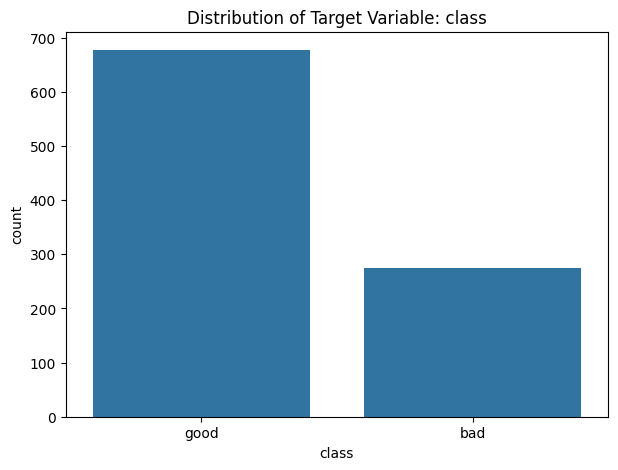

In [ ]:
# Plotting the Target Variable Distribution

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x=target)
plt.title(f"Distribution of Target Variable: {target}")
plt.show()

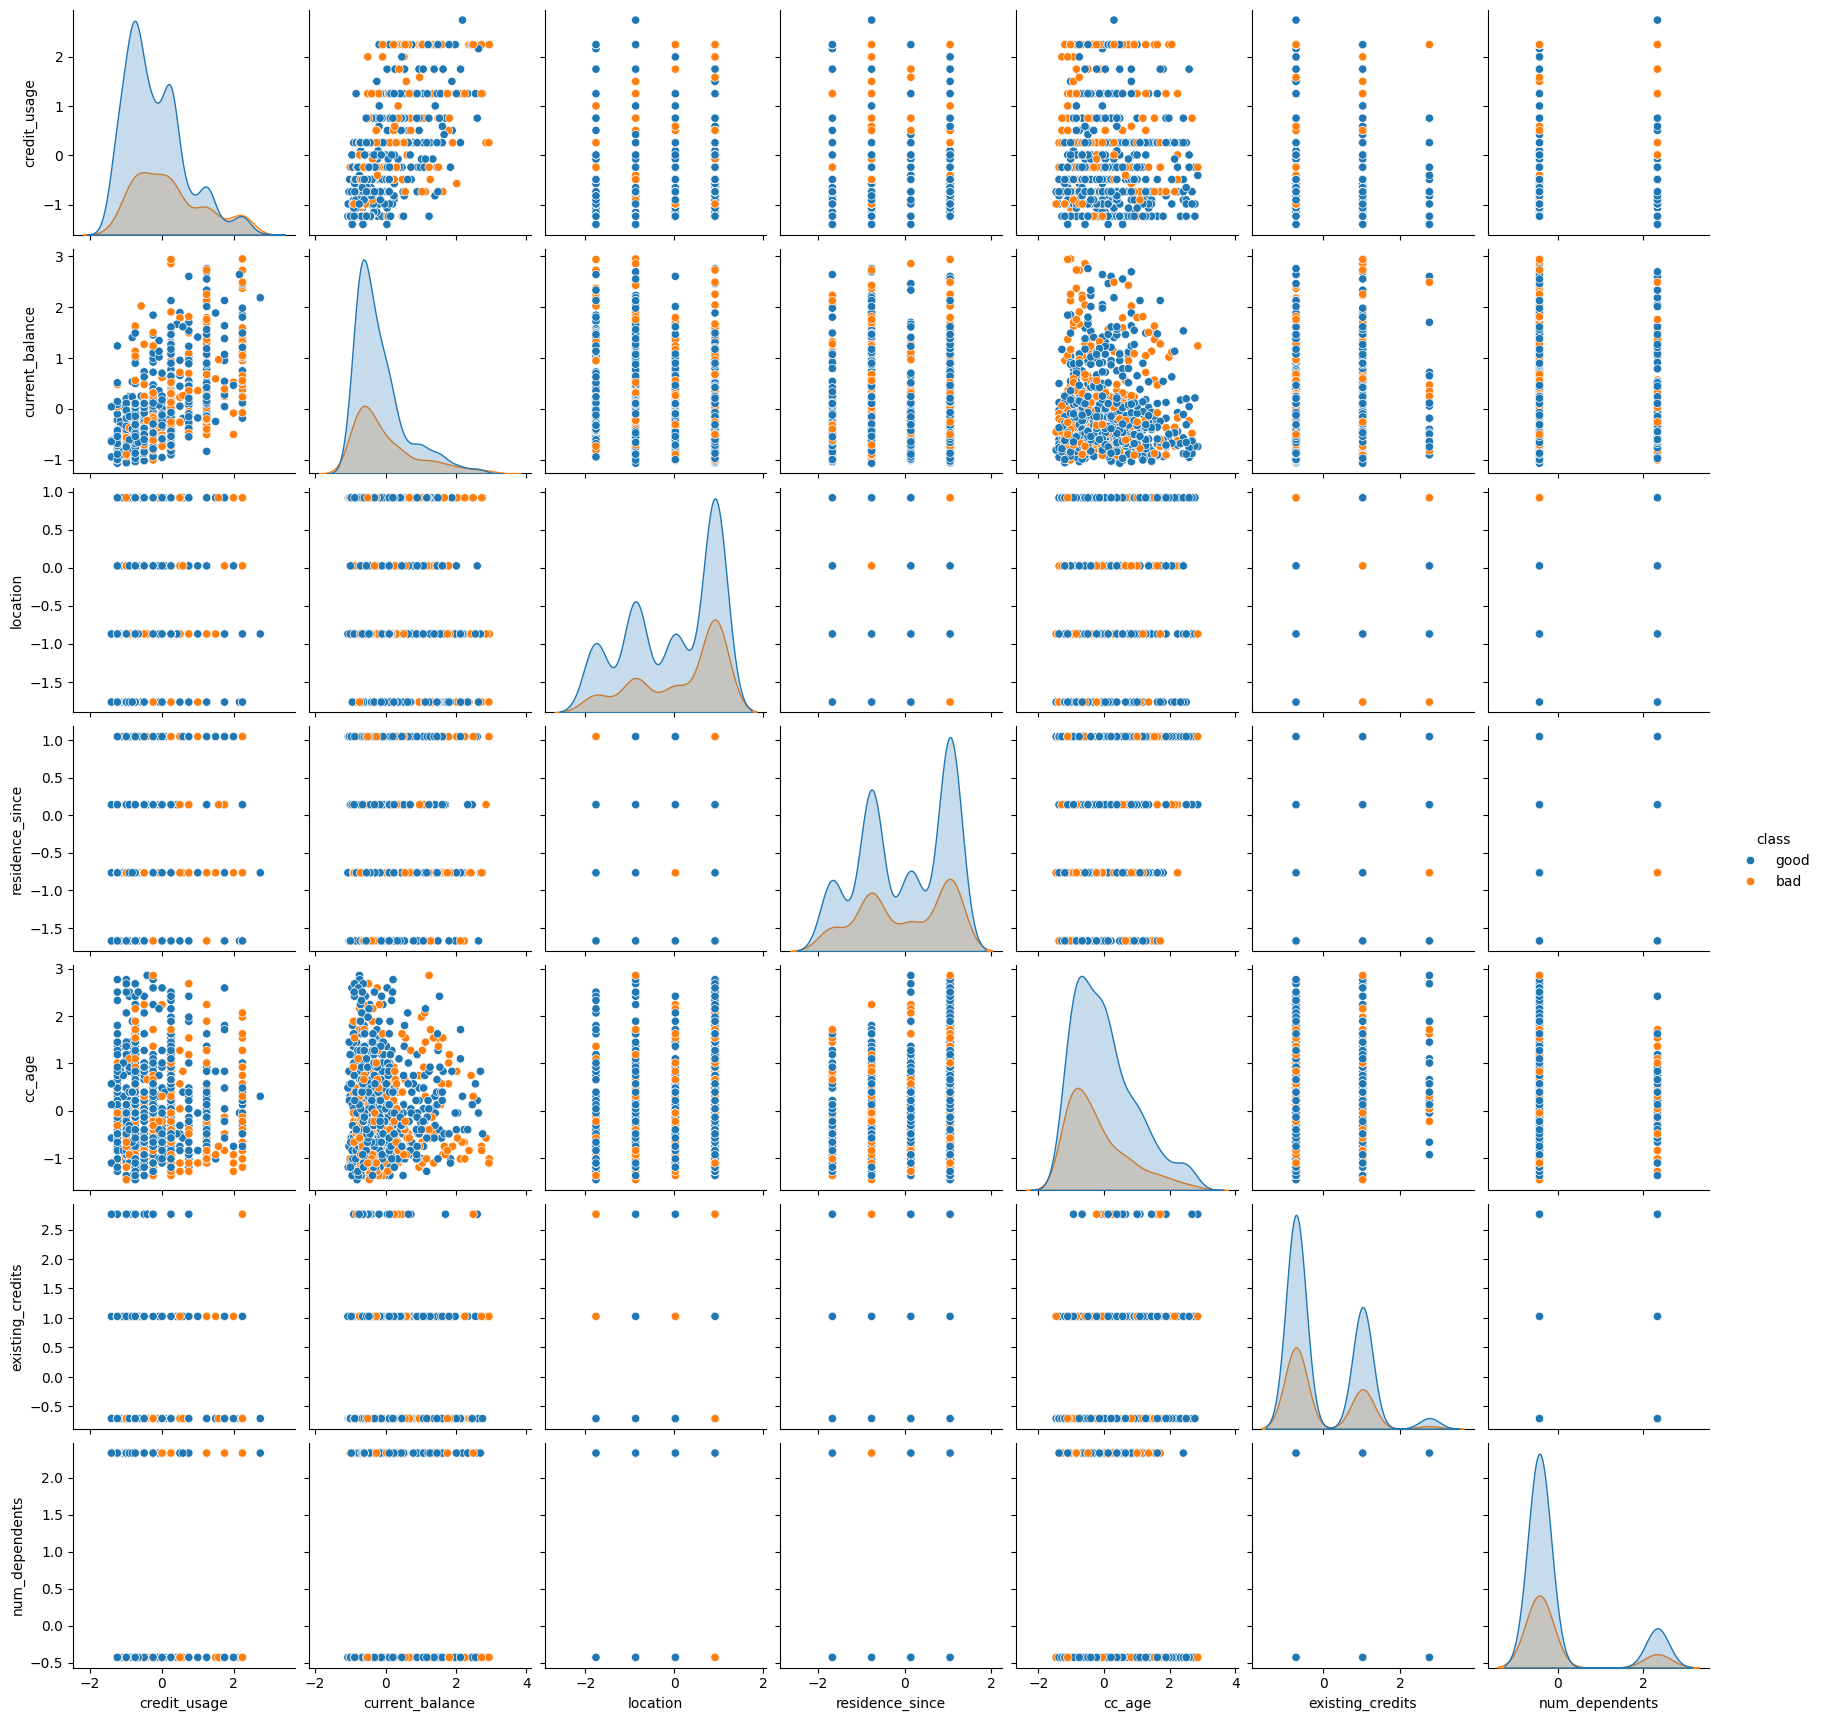

In [ ]:
# Pair Plot to Explore Relationships Between Variables

sns.pairplot(df, hue=target)
plt.show()

Correlation Matrix for Numerical Features:


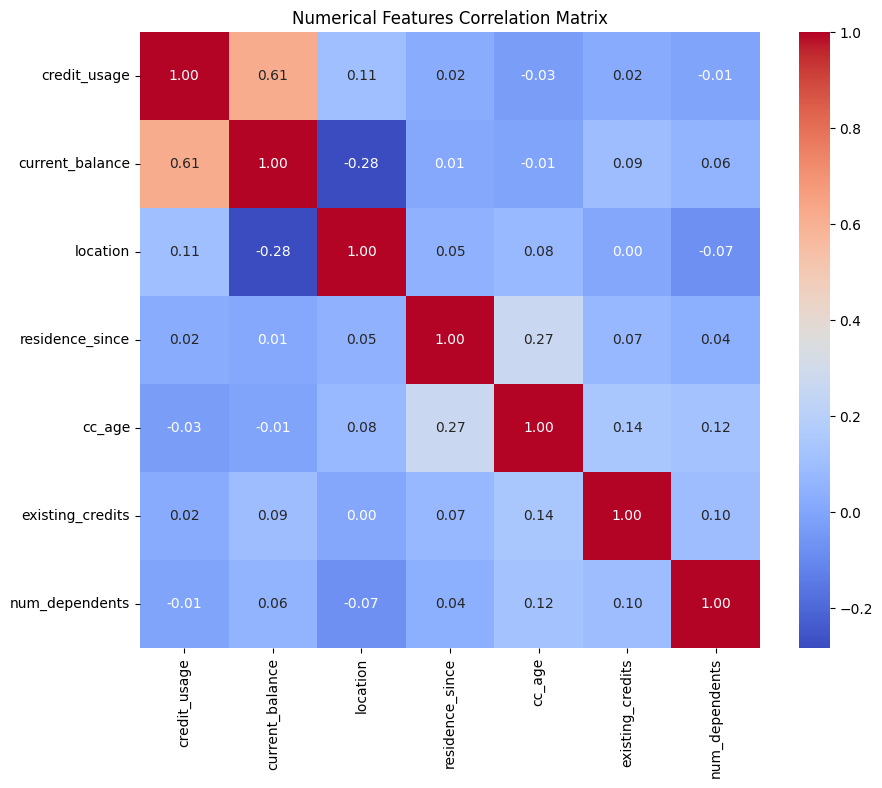

In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(exclude=[np.number]).columns

print("Correlation Matrix for Numerical Features:")
numerical_corr = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Numerical Features Correlation Matrix")
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [ ]:
# Data Transformation - This step involves encoding categorical variables, scaling or normalizing numerical data, and creating new features.

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Split dataset into features (X) and target (y)
X = df.drop(columns=['class'])
y = df['class']

In [ ]:
y.value_counts()

,count
class,
good,677
bad,275


In [ ]:
# Encoding Categorical Variables
# Use Label Encoding or One-Hot Encoding depending on the nature of categorical variables

''' Encoding Categorical Variables: Encodes categorical columns into numerical values using LabelEncoder. This is essential for machine learning models that require numerical input. '''

label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

 Scaling/Normalization: Scales the numerical columns to a standard range, either using StandardScaler for a mean of 0 and standard deviation of 1 or MinMaxScaler for normalization in the range [0,1].


In [ ]:
# Standard Scaling or Min-Max Scaling to numerical features

# Standard Scaling
scaler = StandardScaler()
X[X.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))

# Min-Max Scaling
scaler = MinMaxScaler()
X[X.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))


Feature Engineering -  Adds new features based on domain knowledge or feature interactions to enhance model performance.

In [ ]:
# Creating an interaction term between 'credit_usage' and 'employment'
X['credit_usage_employment_interaction'] = X['credit_usage'] * X['employment']

In [ ]:
print("New features added successfully. Dataset shape after feature engineering:", X.shape)
X.shape

New features added successfully. Dataset shape after feature engineering: (952, 21)


(952, 21)

Feature Selection
This step involves selecting important features that contribute most to predicting the target variable. We'll use correlation analysis

Correlation Analysis
Correlation analysis helps identify relationships between numerical features. Highly correlated features might be redundant.

Correlation Analysis: Identifies pairs of highly correlated features that might be redundant.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for numeric features
correlation_matrix = X.corr()

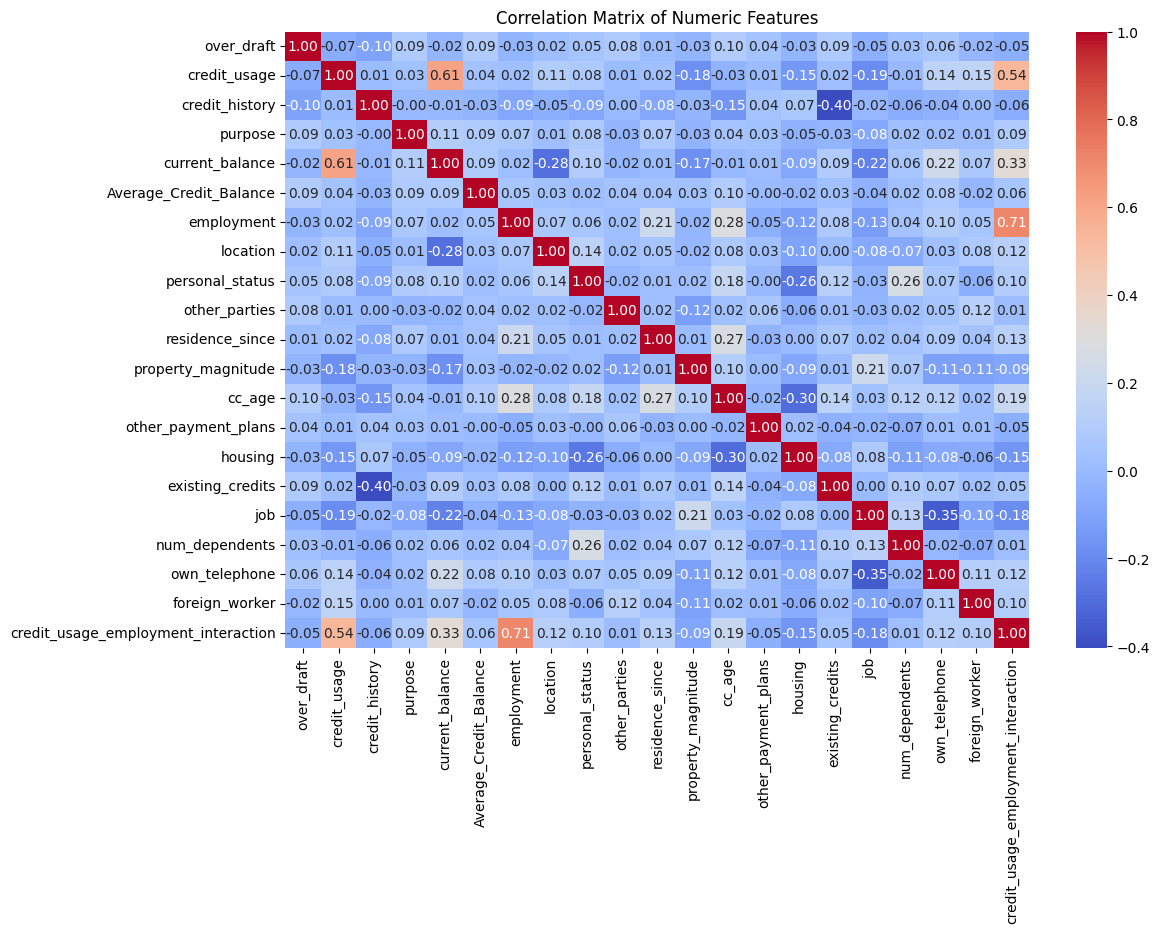

In [ ]:
# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [ ]:
# Identifying highly correlated features (threshold = 0.8)

threshold = 0.8
high_corr_features = [col for col in correlation_matrix.columns if any(correlation_matrix[col].abs() > threshold)]
print("Highly correlated features (correlation > 0.8):", high_corr_features)


Highly correlated features (correlation > 0.8): ['over_draft', 'credit_usage', 'credit_history', 'purpose', 'current_balance', 'Average_Credit_Balance', 'employment', 'location', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'cc_age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker', 'credit_usage_employment_interaction']


In [ ]:
# After completing the transformation and feature selection, the final dataset is ready for model training or further analysis.

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Final Training Set Shape:", X_train.shape)
print("\n")
print("Final Test Set Shape:", X_test.shape)

Final Training Set Shape: (761, 21)


Final Test Set Shape: (191, 21)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(761, 21)
(191, 21)
(761,)
(191,)


 Model Building:
1. Train-Test Split
2. Logistic Regression -  A simple linear model suitable for binary classification tasks. It works well with linearly separable data.
3. Decision Tree Classifier - A tree-based model that splits data based on features. It’s interpretable but prone to overfitting
4. Random Forest Classifier - An ensemble of decision trees that improves accuracy and generalization
5. Support Vector Machine (SVM) - SVM tries to find the optimal hyperplane that separates classes. It can be computationally expensive
6. k-Nearest Neighbors (k-NN) - A distance-based algorithm that predicts based on the most common class of nearest neighbors
7. Gradient Boosting Algorithms - An ensemble technique that builds models sequentially to correct errors of previous models. It’s powerful but computationally expensive.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# 1. Train-Test Split - Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 2. Logistic Regression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predictions
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7225130890052356

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         bad       0.50      0.30      0.38        53
        good       0.77      0.88      0.82       138

    accuracy                           0.72       191
   macro avg       0.63      0.59      0.60       191
weighted avg       0.69      0.72      0.70       191



In [ ]:
# 3. Decision Tree Classifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predictions
y_pred_dt = dt_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.5968586387434555

Classification Report for Decision Tree:
               precision    recall  f1-score   support

         bad       0.31      0.36      0.33        53
        good       0.74      0.69      0.71       138

    accuracy                           0.60       191
   macro avg       0.52      0.52      0.52       191
weighted avg       0.62      0.60      0.61       191



In [ ]:
# 4. Random Forest Classifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.743455497382199

Classification Report for Random Forest:
               precision    recall  f1-score   support

         bad       0.57      0.30      0.40        53
        good       0.77      0.91      0.84       138

    accuracy                           0.74       191
   macro avg       0.67      0.61      0.62       191
weighted avg       0.72      0.74      0.71       191



In [ ]:
# 5. Support Vector Machine (SVM)

svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predictions
y_pred_svm = svm_clf.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report for SVM:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7382198952879581

Classification Report for SVM:
               precision    recall  f1-score   support

         bad       0.67      0.11      0.19        53
        good       0.74      0.98      0.84       138

    accuracy                           0.74       191
   macro avg       0.70      0.55      0.52       191
weighted avg       0.72      0.74      0.66       191



In [ ]:
# 6. k-Nearest Neighbors (k-NN)

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predictions
y_pred_knn = knn_clf.predict(X_test)
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report for k-NN:\n", classification_report(y_test, y_pred_knn))

k-NN Accuracy: 0.7015706806282722

Classification Report for k-NN:
               precision    recall  f1-score   support

         bad       0.45      0.36      0.40        53
        good       0.77      0.83      0.80       138

    accuracy                           0.70       191
   macro avg       0.61      0.60      0.60       191
weighted avg       0.68      0.70      0.69       191



In [ ]:
# 7. Gradient Boosting Algorithms

gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Predictions
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report for Gradient Boosting:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.7120418848167539

Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

         bad       0.47      0.36      0.41        53
        good       0.77      0.85      0.81       138

    accuracy                           0.71       191
   macro avg       0.62      0.60      0.61       191
weighted avg       0.69      0.71      0.70       191



In [ ]:
# Accuracy of all models
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log_reg),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "k-NN": accuracy_score(y_test, y_pred_knn),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb)
}

print("Model Performance:\n\n")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")

Model Performance:


Logistic Regression: 0.7225
Decision Tree: 0.5969
Random Forest: 0.7435
SVM: 0.7382
k-NN: 0.7016
Gradient Boosting: 0.7120
